In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.fft import fft, fftfreq, ifft

In [3]:
btc = pd.read_csv('../data/BTC-USD_3600_prices.csv')

In [13]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73397 entries, 0 to 73396
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   low     73397 non-null  float64
 1   high    73397 non-null  float64
 2   open    73397 non-null  float64
 3   close   73397 non-null  float64
 4   volume  73397 non-null  float64
dtypes: float64(5)
memory usage: 2.8 MB


In [36]:
btc.iloc[60000:70000].describe()

,low,high,open,close,volume,delta,theta,amplitude,freq
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,0.0,0.0,10000.000000
mean,22983.227553,23159.408808,23072.417464,23072.641331,875.563008,0.094613,NaN,NaN,-0.114412
std,4432.344168,4456.894554,4444.693911,4444.855365,877.943539,134.459104,NaN,NaN,0.039333
min,15460.000000,15748.810000,15630.700000,15632.810000,31.413194,-1840.000000,NaN,NaN,-0.182528
25%,19447.947500,19608.397500,19519.052500,19519.610000,333.680415,-45.417500,NaN,NaN,-0.148470
50%,22368.260000,22572.965000,22449.300000,22449.165000,623.186240,0.520000,NaN,NaN,-0.114412
75%,27113.510000,27245.200000,27175.555000,27175.900000,1097.064843,46.272500,NaN,NaN,-0.080354
max,31857.210000,32383.960000,32143.980000,32145.980000,12366.181575,1139.270000,NaN,NaN,-0.046296


/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: ylabel='close'>

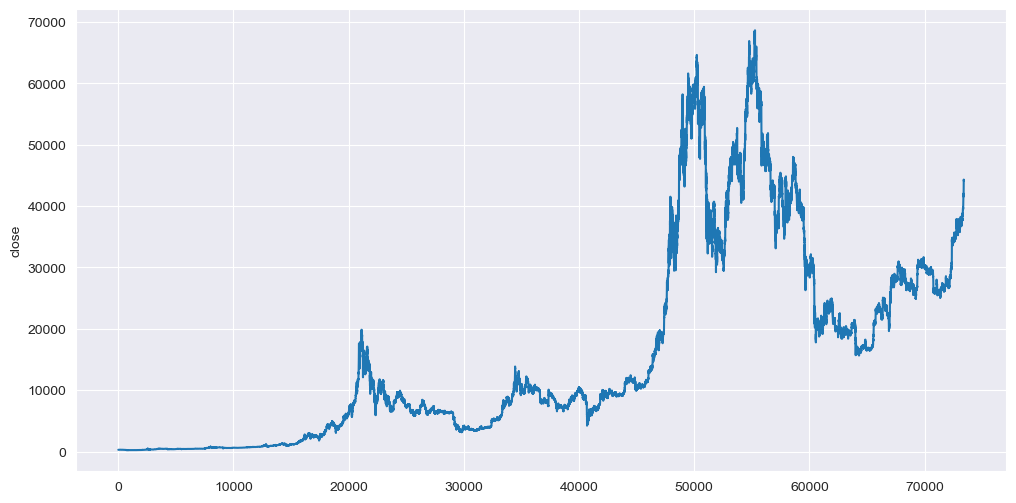

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(btc['close'])

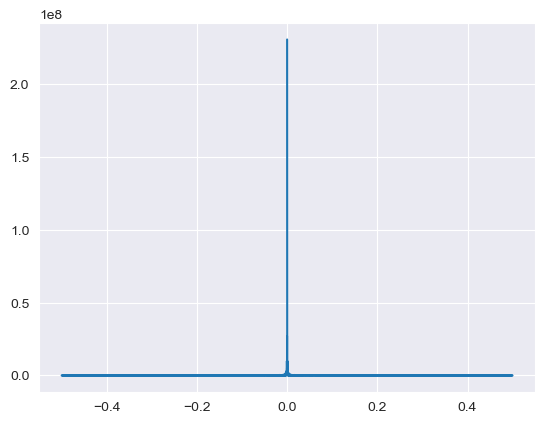

In [31]:
recent_lull = btc['close'].iloc[60000:70000]
n = len(recent_lull)
y = recent_lull.values
x = np.arange(n)
yf = fft(y)
psd = yf * np.conj(yf) / n
xf = fftfreq(n)

plt.plot(xf, np.abs(yf))
#plt.plot(xf, psd)

In [26]:
print(yf.imag.mean())
print(yf.real.mean())
print(yf.imag.std())
print(yf.real.std())
print(yf.imag.max())
print(yf.real.max())

1.4901161193847657e-12
29363.279999999995
275069.3273775055
2333343.1119848206
17225731.85955106
230726413.31


In [35]:
(yf.imag/yf.real).max()
(np.abs(yf) / 1000).max()

230726.41331

In [38]:
recent_lull.values.reshape(-1, 1).shape

(10000, 1)

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

btc_slice_scaled = MinMaxScaler().fit_transform(btc['close'].iloc[60000:70000].values.reshape(-1, 1)).flatten()

In [54]:
btc_slice_scaled.shape

(10000,)

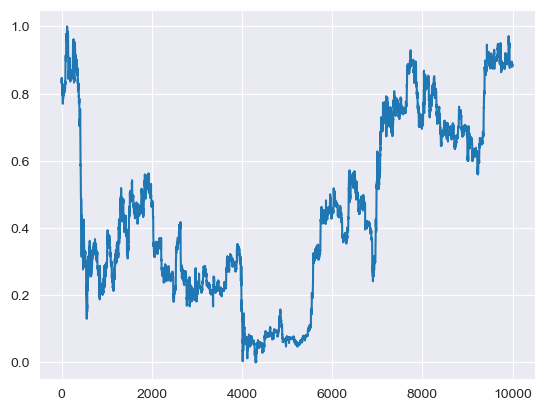

In [77]:
plt.plot(btc_slice_scaled)

In [73]:
n = len(btc_slice_scaled)
trans = fft(btc_slice_scaled, axis=0)
psd = trans * np.conj(trans) / n
xf = fftfreq(n)

In [66]:
print(trans.imag.mean())
print(trans.real.mean())
print(trans.imag.std())
print(trans.real.std())
print(trans.imag.max())
print(trans.real.max())
print(trans.imag.min())
print(trans.real.min())

0.0
0.8314860199465034
16.657572554361487
49.76087135338134
1043.1511248022675
4505.392563026966
-1043.1511248022675
-258.0348645043406


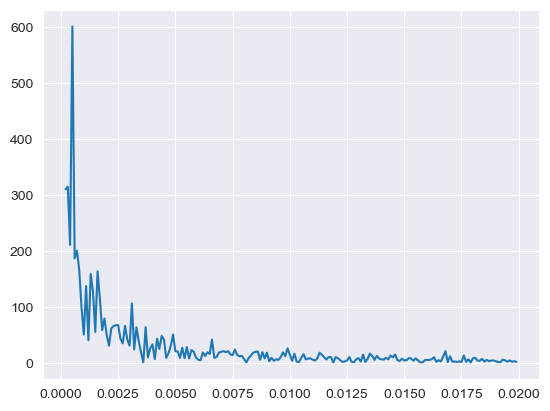

In [74]:
plt.plot(xf[2:200], np.abs(trans)[2:200])

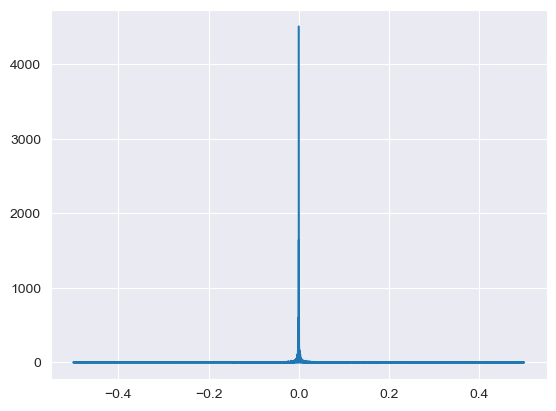

In [84]:
plt.plot(xf[:], np.abs(trans)[:])

In [81]:
amplitude = np.abs(trans)[0:]
mean_amp = amplitude.mean()
std_amp = amplitude.std()
threshold = mean_amp + 2 * std_amp
print(mean_amp)
print(std_amp)
print(threshold)
signals = amplitude > threshold
signals

2.7546331026282664
52.40918246569829
107.57299803402483


array([ True,  True,  True, ...,  True,  True,  True])

In [88]:
df = pd.DataFrame({'amplitude': amplitude, 'signals': signals})
df.head(50)

,amplitude,signals
0,4505.392563,True
1,1639.259781,True
2,310.984551,True
3,315.636863,True
4,211.676977,True
5,601.788077,True
6,187.767175,True
7,201.540512,True
8,166.569943,True
9,99.500185,False


In [89]:
df.tail(50)

,amplitude,signals
9950,21.849987,False
9951,51.752944,False
9952,31.726366,False
9953,18.575295,False
9954,9.803480,False
9955,42.971718,False
9956,49.250225,False
9957,25.926572,False
9958,44.309810,False
9959,7.909613,False


In [76]:
xf.max()

0.4999

In [45]:
yf

array([[0.83148602+0.j],
       [0.84362663+0.j],
       [0.84703845+0.j],
       ...,
       [0.88654389+0.j],
       [0.88158119+0.j],
       [0.88063285+0.j]])

        delta  theta  amplitude    freq
60000     NaN    NaN        NaN  0.0000
60001  200.48    NaN        NaN  0.0001
60002   56.34    NaN        NaN  0.0002
60003  -40.42    NaN        NaN  0.0003
60004 -223.58    NaN        NaN  0.0004


Text(0.5, 1.0, 'Frequency domain')

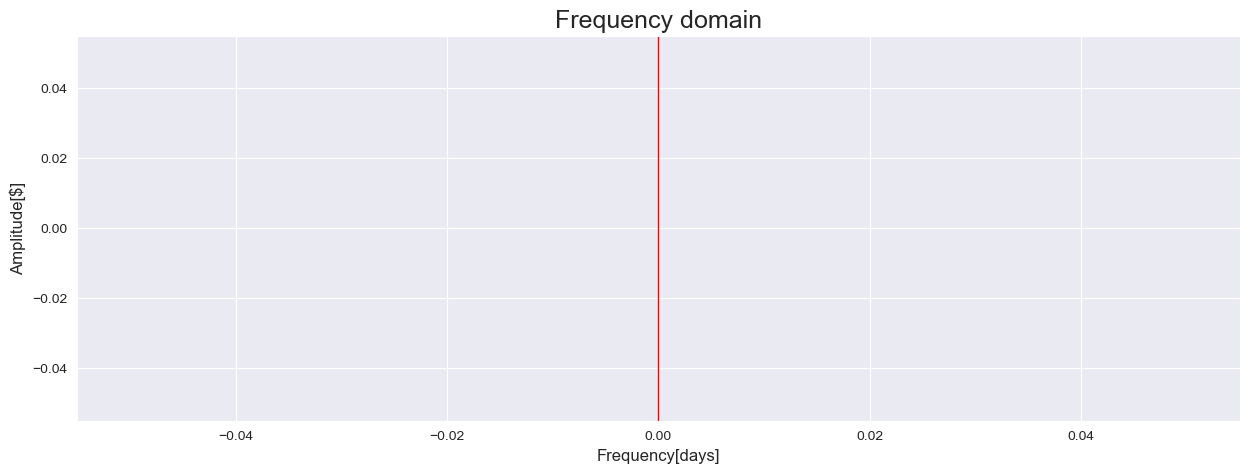

In [22]:
btc_fft_df = pd.DataFrame()
btc_fft_df['delta'] = recent_lull.diff()
sp=np.fft.fft(btc_fft_df['delta'].values)
btc_fft_df['theta']=np.arctan(sp.imag/sp.real)
numValues = len(btc_fft_df)
numValuesHalf = numValues/2
btc_fft_df['amplitude']=np.sqrt(sp.real**2 + sp.imag**2)/numValuesHalf
btc_fft_df['freq'] = np.fft.fftfreq(sp.size, d=1)
print(btc_fft_df.head())
plt.figure(figsize=(15,5))
plt.plot(btc_fft_df['freq'],btc_fft_df['amplitude'].values,'.')
plt.axvline(x=0,ymin=0,ymax=1,linewidth=1,color='r')
plt.ylabel('Amplitude[$]', fontsize=12)
plt.xlabel('Frequency[days]', fontsize=12)
plt.title('Frequency domain', fontsize=18)

In [20]:
btc.head()

,low,high,open,close,volume,delta,theta,amplitude,freq
0,277.92,278.00,277.98,278.00,59.260456,NaN,NaN,NaN,0.000000
1,277.37,278.50,278.00,278.14,346.995411,0.14,NaN,NaN,0.000014
2,278.15,280.00,278.31,280.00,376.627552,1.86,NaN,NaN,0.000027
3,279.38,281.00,279.96,280.89,288.177976,0.89,NaN,NaN,0.000041
4,280.35,281.15,280.89,280.36,380.933023,-0.53,NaN,NaN,0.000054


In [9]:
tranform = fft(btc['close'])
psd = np.abs(tranform) ** 2
spectrum = tranform * np.conj(tranform) / len(btc['close'])
freq = np.fft.fftfreq(len(btc['close']))

/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


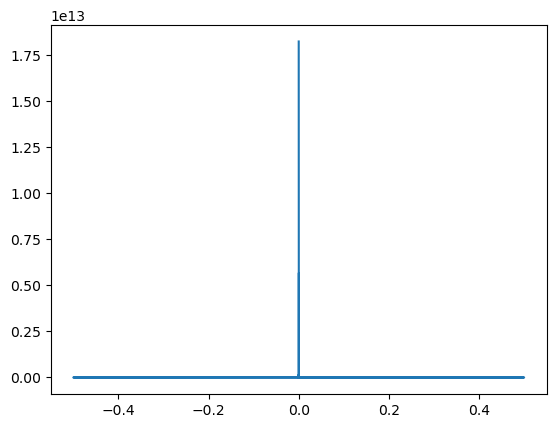

In [11]:
plt.plot(freq, spectrum)

/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: >

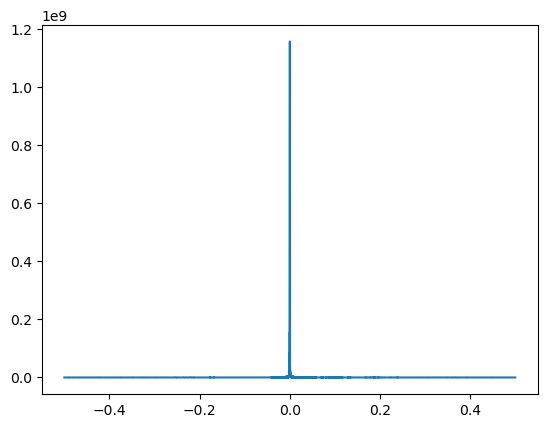

In [10]:
sns.lineplot(x=freq, y=np.abs(tranform))